# **📌DATA SCHOOL PROJECT11**  
**┗ 온라인 화장품 shop 고객분석**
---
> **목차(Context)**

* 프로젝트 Summary
* 문제상황 Introduction
* 🔈Process01
* 🔉Process02
* 🔊Process03

## **프로젝트 Summary**
---

> **프로젝트명**

```
▶ 온라인 화장품 shop 고객분석
```  

> **프로젝트유형**

```
▶ 데이터 EDA 및 인사이트 도출
```

> **학습목표**

```
▶ 온라인 화장품 shop의 고객 행동 패턴 이해
▶ 제품별, 브랜드별 선호도 파악
▶ 구매 전환률 개선을 위한 핵심 인사이트 도출
```

## **문제상황 Introduction**
---

> **시나리오**

```
A사는 온라인 화장품 shop의 판매 전략을 개선하기 위해 고객의 행동 패턴과 선호도를 분석하려 한다.

```  

> **문제정의**

```
▶ 고객 이해에 대한 정보 부족
▶ Q. 어떤 제품 또는 브랜드가 가장 인기가 있을까?
▶ Q. 고객들이 카트에 담았으나 구매하지 않는 제품들은 무엇일까?
▶ Q. 구매 전환률을 높이기 위한 전략은 무엇일까?
```  

> **기대효과**

```
▶ 매출 증대와 높은 고객 만족도를 달성
▶ 효과적인 마케팅 전략 수립
▶ 재고 관리 및 제품 전략의 효율화
```

> **해결방안**

```
▶ 데이터를 통한 고객의 제품 및 브랜드 선호도 파악
▶ 카트에 담기만 하고 구매되지 않는 제품들의 공통점 분석
▶ 구매 전환률을 높일 수 있는 마케팅 전략 제안
```

> **성과측정**  

```
▶ 구매 전환률의 증가
▶ 고객 만족도 조사를 통한 평가
▶ 매출 증대 및 재구매율 증가
```

> **운영**  

```
▶ 주기적으로 데이터를 수집하고 분석하여 전략을 수정 및 적용
▶ 고객의 피드백을 수집하여 서비스 개선
▶ 새로운 제품 또는 브랜드의 반응을 모니터링하여 전략 반영
```

> **데이터 살펴보기**

* 데이터 명세 ⬇

|Column|Description|
|:---|:---|
|event_time|이벤트가 발생한 시간|
|event_type|이벤트 유형: [view, cart, remove_from_cart, purchase] 중 하나|
|product_id|제품 ID|
|category_id|제품 카테고리 ID|
|category_code|의미 있는 카테고리 이름 (있는 경우)|
|brand|브랜드 이름 (소문자로, 있을 경우)|
|price|제품 가격|
|user_id|영구 사용자 ID|
|user_session|사용자 세션 ID|





In [ ]:
# ▶ Warnings 제거
import warnings
warnings.filterwarnings('ignore')

# ▶ Google drive mount or 폴더 클릭 후 구글드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

# ▶ 경로 설정 (※강의자료가 위치에 있는 경로 확인)
import os
os.chdir('/content/drive/MyDrive/zerobase/project11')
os.getcwd()

Mounted at /content/drive


'/content/drive/MyDrive/zerobase/project11'

In [ ]:
# ▶ pd.set option
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

# ▶ Data read
df = pd.read_csv('S_PJT11_DATA.csv')
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-12-01 00:00:00 UTC,remove_from_cart,5712790,1487580005268456287,NaN,f.o.x,6.27,576802932,51d85cb0-897f-48d2-918b-ad63965c12dc
1,2019-12-01 00:00:00 UTC,view,5764655,1487580005411062629,NaN,cnd,29.05,412120092,8adff31e-2051-4894-9758-224bfa8aec18
2,2019-12-01 00:00:02 UTC,cart,4958,1487580009471148064,NaN,runail,1.19,494077766,c99a50e8-2fac-4c4d-89ec-41c05f114554
3,2019-12-01 00:00:05 UTC,view,5848413,1487580007675986893,NaN,freedecor,0.79,348405118,722ffea5-73c0-4924-8e8f-371ff8031af4
4,2019-12-01 00:00:07 UTC,view,5824148,1487580005511725929,NaN,NaN,5.56,576005683,28172809-7e4a-45ce-bab0-5efa90117cd5


## **🔈Process01**  
**┗ Data Info Check**  
---

### · Data 전처리  
---
* 수집된 데이터의 기본 정보들을 확인  

  (1) Data shape(형태) 확인

  (2) Data type 확인

  (3) Null값 확인 (※ 빈 값의 Data)

  (4) Outlier 확인 (※ 정상적인 범주를 벗어난 Data)  


In [ ]:
# ▶ Data  확인
print('df', df.shape)

df (3533286, 9)


In [ ]:
# ▶ Data type 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3533286 entries, 0 to 3533285
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 242.6+ MB


In [ ]:
# ▶ null값 확인
print(df.isnull().sum())

event_time             0
event_type             0
product_id             0
category_id            0
category_code    3474821
brand            1510289
price                  0
user_id                0
user_session         779
dtype: int64


In [ ]:
# ▶ Null value 다른 값으로 치환
df['category_code'].fillna('None', inplace = True)
df['brand'].fillna('None', inplace = True)
df['user_session'].fillna('None', inplace = True)

In [ ]:
# ▶ Outlier 확인
df.describe()

,product_id,category_id,price,user_id
count,3.533286e+06,3.533286e+06,3.533286e+06,3.533286e+06
mean,5.473054e+06,1.555023e+18,8.871856e+00,5.223318e+08
std,1.331331e+06,1.689262e+17,1.986474e+01,8.494819e+07
min,3.752000e+03,1.487580e+18,-7.937000e+01,1.180452e+06
25%,5.726191e+06,1.487580e+18,2.060000e+00,4.866830e+08
50%,5.811429e+06,1.487580e+18,4.210000e+00,5.566496e+08
75%,5.859462e+06,1.487580e+18,7.140000e+00,5.828019e+08
max,5.917178e+06,2.235524e+18,3.277800e+02,5.954145e+08


In [ ]:
# 3533286, 9
df.shape

(3533286, 9)

In [ ]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-12-01 00:00:00 UTC,remove_from_cart,5712790,1487580005268456287,None,f.o.x,6.27,576802932,51d85cb0-897f-48d2-918b-ad63965c12dc
1,2019-12-01 00:00:00 UTC,view,5764655,1487580005411062629,None,cnd,29.05,412120092,8adff31e-2051-4894-9758-224bfa8aec18
2,2019-12-01 00:00:02 UTC,cart,4958,1487580009471148064,None,runail,1.19,494077766,c99a50e8-2fac-4c4d-89ec-41c05f114554
3,2019-12-01 00:00:05 UTC,view,5848413,1487580007675986893,None,freedecor,0.79,348405118,722ffea5-73c0-4924-8e8f-371ff8031af4
4,2019-12-01 00:00:07 UTC,view,5824148,1487580005511725929,None,None,5.56,576005683,28172809-7e4a-45ce-bab0-5efa90117cd5


In [ ]:
event_counts = df['event_type'].value_counts()
event_counts

event_type
view                1728331
cart                 927124
remove_from_cart     664655
purchase             213176
Name: count, dtype: int64

## **🔉Process02**  
**┗ 기본지표 확인**  
---

### · 전체 이벤트 유형별 발생 횟수
---

In [ ]:
# ▶ 이벤트 타입 횟수
event_counts = df['event_type'].value_counts()
event_counts

event_type
view                1728331
cart                 927124
remove_from_cart     664655
purchase             213176
Name: count, dtype: int64

In [ ]:
event_counts['view']

1728331

In [ ]:
df['event_type'].unique()

array(['remove_from_cart', 'view', 'cart', 'purchase'], dtype=object)

In [ ]:

view_to_cart_dropout = (event_counts['view'] - event_counts['cart']) / event_counts['view'] * 100
cart_to_purchase_dropout = (event_counts['cart'] - event_counts['purchase']) / event_counts['cart'] * 100
cart_to_remove_dropout = (event_counts['remove_from_cart']) / event_counts['cart'] * 100

dropout_rates = {
    'View to Cart Dropout Rate (%)': view_to_cart_dropout,
    'Cart to Purchase Dropout Rate (%)': cart_to_purchase_dropout,
    'Cart to Remove Dropout Rate (%)': cart_to_remove_dropout
}

dropout_rates

{'View to Cart Dropout Rate (%)': 46.35726605609689,
 'Cart to Purchase Dropout Rate (%)': 77.00674343453518,
 'Cart to Remove Dropout Rate (%)': 71.68997890249848}

In [ ]:
# ▶ 각 단계에서의 이탈률 계산
view_to_cart_dropout = (event_counts['view'] - event_counts['cart']) / event_counts['view'] * 100
cart_to_purchase_dropout = (event_counts['cart'] - event_counts['purchase']) / event_counts['cart'] * 100
cart_to_remove_dropout = (event_counts['remove_from_cart']) / event_counts['cart'] * 100

dropout_rates = {
    'View to Cart Dropout Rate (%)': view_to_cart_dropout,
    'Cart to Purchase Dropout Rate (%)': cart_to_purchase_dropout,
    'Cart to Remove Dropout Rate (%)': cart_to_remove_dropout
}

dropout_rates

{'View to Cart Dropout Rate (%)': 46.35726605609689,
 'Cart to Purchase Dropout Rate (%)': 77.00674343453518,
 'Cart to Remove Dropout Rate (%)': 71.68997890249848}

### · 판매 Category TOP 10
---

In [ ]:
df.head(2)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-12-01 00:00:00 UTC,remove_from_cart,5712790,1487580005268456287,None,f.o.x,6.27,576802932,51d85cb0-897f-48d2-918b-ad63965c12dc
1,2019-12-01 00:00:00 UTC,view,5764655,1487580005411062629,None,cnd,29.05,412120092,8adff31e-2051-4894-9758-224bfa8aec18


In [ ]:
# ▶ 가장 많이 판매된 상품 TOP 10 계산 - N/A 고려하지 않은 상태
top_sold_products = df[df['event_type'] == 'purchase']['product_id'].value_counts().head(10)
top_sold_products

product_id
5809910    1659
5854897     786
5802432     714
5700037     621
5809912     620
5833330     594
5304        549
5751422     548
5815662     521
5751383     435
Name: count, dtype: int64

In [ ]:
# ▶ 가장 많이 판매된 상품 TOP 10 계산 (NA가 많아 큰 의미가 없음)
top_sold_products = df[df['event_type'] == 'purchase']['category_code'].value_counts(dropna=False).head(10)
top_sold_products

category_code
None                                      210470
stationery.cartrige                          984
apparel.glove                                771
appliances.environment.vacuum                636
furniture.bathroom.bath                      183
accessories.bag                               42
furniture.living_room.cabinet                 40
accessories.cosmetic_bag                      34
appliances.personal.hair_cutter               14
appliances.environment.air_conditioner         2
Name: count, dtype: int64

dtype('int64')

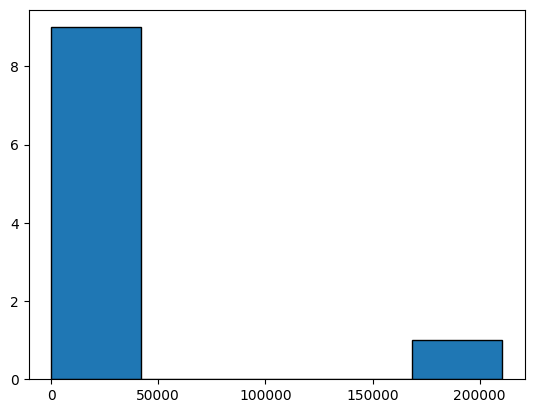

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.plot(x, y, marker='o', linestyle='-', color='b', label='Data 1')
plt.show()

In [ ]:
df.head(2)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-12-01 00:00:00 UTC,remove_from_cart,5712790,1487580005268456287,None,f.o.x,6.27,576802932,51d85cb0-897f-48d2-918b-ad63965c12dc
1,2019-12-01 00:00:00 UTC,view,5764655,1487580005411062629,None,cnd,29.05,412120092,8adff31e-2051-4894-9758-224bfa8aec18


In [ ]:
#유니크한 product의 갯수는 약 44600
df['product_id'].nunique()

44624

In [ ]:
#Sale column 새로 생성
df['sales'] = df['price'] * df['event_type'].apply(lambda x: 1 if x == 'purchase' else 0)
df.head(2)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,sales
0,2019-12-01 00:00:00 UTC,remove_from_cart,5712790,1487580005268456287,None,f.o.x,6.27,576802932,51d85cb0-897f-48d2-918b-ad63965c12dc,0.0
1,2019-12-01 00:00:00 UTC,view,5764655,1487580005411062629,None,cnd,29.05,412120092,8adff31e-2051-4894-9758-224bfa8aec18,0.0


### · 매출 TOP 10
---

In [ ]:
# ▶ 상품별 매출 계산
df['sales'] = df['price'] * df['event_type'].apply(lambda x: 1 if x == 'purchase' else 0)

# ▶ 가장 많은 매출을 기록한 상품 TOP 10
top_sales_products = df.groupby('product_id').sum()['sales'].sort_values(ascending=False).head(10)
top_sales_products

product_id
5850281    10471.28
5560754    10110.88
5809910     8693.16
5751422     6000.60
5751383     4489.20
5877454     4473.29
5909810     4326.63
5846437     4297.80
5849033     4066.08
5792800     4066.08
Name: sales, dtype: float64

### · 브랜드별 판매량 및 매출
---

In [ ]:
# ▶ 브랜드별 판매량 계산
brand_sales_count = df[df['event_type'] == 'purchase'].groupby('brand').size()

# ▶ 브랜드별 매출 계산
brand_sales_revenue = df[df['event_type'] == 'purchase'].groupby('brand').sum()['sales']

brand_sales = pd.DataFrame({
    'Sales Count': brand_sales_count,
    'Sales Revenue': brand_sales_revenue
}).sort_values(by='Sales Revenue', ascending=False)

brand_sales.head(10)

,Sales Count,Sales Revenue
brand,,
None,91695,440207.57
runail,18199,58177.26
grattol,8171,43793.50
irisk,10583,35291.51
uno,2780,29084.76
estel,4116,24474.19
jessnail,1823,24075.00
strong,120,22266.41
masura,6985,19809.19


In [ ]:
#Top 10 브랜드별 매출 과 세일즈당 매출
brand_sales['ratio'] = round(brand_sales['Sales Revenue'] / brand_sales['Sales Count'] * 100, 2)
brand_sales.head(11)

,Sales Count,Sales Revenue,ratio
brand,,,
None,91695,440207.57,480.08
runail,18199,58177.26,319.67
grattol,8171,43793.50,535.96
irisk,10583,35291.51,333.47
uno,2780,29084.76,1046.21
estel,4116,24474.19,594.61
jessnail,1823,24075.00,1320.63
strong,120,22266.41,18555.34
masura,6985,19809.19,283.60


In [ ]:
df.head(2)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,sales
0,2019-12-01 00:00:00 UTC,remove_from_cart,5712790,1487580005268456287,None,f.o.x,6.27,576802932,51d85cb0-897f-48d2-918b-ad63965c12dc,0.0
1,2019-12-01 00:00:00 UTC,view,5764655,1487580005411062629,None,cnd,29.05,412120092,8adff31e-2051-4894-9758-224bfa8aec18,0.0


In [ ]:
# ▶ 사용자별 구매 횟수 계산
user_purchase_counts = df.loc[df['event_type'] == 'purchase'].groupby('user_id').size()

# ▶ 사용자별 평균 구매 횟수 계산
average_purchase_per_user = user_purchase_counts.mean()


In [ ]:
df.loc[df['event_type'] == 'purchase'].groupby('user_id').size().mean()

8.322960996369032

### ·  사용자별 평균 구매 횟수
---

In [ ]:
# ▶ 사용자별 구매 횟수 계산
user_purchase_counts = df.loc[df['event_type'] == 'purchase'].groupby('user_id').size()

# ▶ 사용자별 평균 구매 횟수 계산
average_purchase_per_user = df.loc[df['event_type'] == 'purchase'].groupby('user_id').size().mean()

average_purchase_per_user


8.322960996369032

### · 상품별 Conversion Rate 분석
---

In [ ]:
# ▶ 상품별 조회, 장바구니 추가, 구매 데이터 계산
product_events = df.groupby(['product_id', 'event_type']).size().unstack().fillna(0)

# ▶ 구매 전환률 계산: 구매수 / 조회수
product_events['conversion_rate'] = product_events['purchase'] / product_events['view'] * 100

# ▶ 상품별 조회수가 10회 이상인 상품들만 필터링하여 전환률 TOP 10 확인
top_conversion_products = product_events[product_events['view'] >= 10].sort_values(by=['view', 'conversion_rate'], ascending=[False, True]).head(10)

top_conversion_products[['view', 'cart', 'purchase', 'conversion_rate']]

event_type,view,cart,purchase,conversion_rate
product_id,,,,
5809910,24419.0,6513.0,1659.0,6.793890
5909810,8473.0,675.0,231.0,2.726307
5877454,6621.0,519.0,101.0,1.525449
5809912,5944.0,2634.0,620.0,10.430686
5886282,5488.0,459.0,90.0,1.639942
5877456,5022.0,161.0,15.0,0.298686
5649236,4372.0,621.0,148.0,3.385178
5809911,4307.0,1757.0,386.0,8.962155
5769877,4100.0,188.0,27.0,0.658537


In [ ]:
data_funnel=df[df['event_type']!='remove_from_cart'].groupby(['event_type'],as_index=False)['event_time'].count()
data_funnel.columns=['event_type','# events']
data_funnel.sort_values('# events', inplace=True,ascending=False)
data_funnel.reset_index(drop=True,inplace=True)
data_funnel['percent']=data_funnel['# events']/(data_funnel['# events'][0].sum())*100
data_funnel

,event_type,# events,percent
0,view,1728331,100.000000
1,cart,927124,53.642734
2,purchase,213176,12.334211


In [ ]:
#Event type , coversion rate graph 하나
from plotly import graph_objects as go

fig = go.Figure(go.Funnel(
    y = data_funnel["event_type"],
    x = data_funnel["# events"],
    customdata=data_funnel["percent"],
    texttemplate= "<b>%{label}: </B>%{value:.2s}"+"<br><b>% of Total:</b> %{customdata:.2f}%",
    textposition='inside',
    marker = {"color": ["lightyellow", "lightsalmon", "tan"]}
    ))
fig.update_yaxes(visible=False)
fig.update_layout(template='simple_white',
                  title={'xanchor': 'center',
                         'yanchor': 'top',
                         'y':0.9,
                         'x':0.5,
                         'text':"Customer Funnel for Purchase Journey"})
fig.show()

In [ ]:
#product ID 별 view cart purhcase conversion_rate으로 나눠 상품별 얼마나 팔렸는지 확인

# ▶ 상품별 조회, 장바구니 추가, 구매 데이터 계산
product_events = df.groupby(['product_id', 'event_type']).size().unstack().fillna(0)

# "event_type' 열을 열 인덱스로 변환하기위해 unstack() 메서드 적용
# 인자가 없을 때는 unstack(level=-1)로 맨 마지막 인덱스의 값들이 열인덱스 역할을 한다.

# ▶ 구매 전환률 계산: 구매수 / 조회수
product_events['conversion_rate'] =  product_events['purchase'] /product_events['view'] * 100

# ▶ 상품별 조회수가 10회 이상인 상품들만 필터링하여 전환률 TOP 10 확인
top_conversion_products = product_events[product_events['view'] >= 10].sort_values(by=['view', 'conversion_rate'], ascending=[False, True]).head(10)

# top_conversion_products.columns  =['view', 'cart', 'purchase', 'conversion_rate']
top_conversion_products


event_type,cart,purchase,remove_from_cart,view,conversion_rate
product_id,,,,,
5809910,6513.0,1659.0,2634.0,24419.0,6.793890
5909810,675.0,231.0,292.0,8473.0,2.726307
5877454,519.0,101.0,306.0,6621.0,1.525449
5809912,2634.0,620.0,1677.0,5944.0,10.430686
5886282,459.0,90.0,246.0,5488.0,1.639942
5877456,161.0,15.0,114.0,5022.0,0.298686
5649236,621.0,148.0,277.0,4372.0,3.385178
5809911,1757.0,386.0,1187.0,4307.0,8.962155
5769877,188.0,27.0,108.0,4100.0,0.658537


In [ ]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,sales
0,2019-12-01 00:00:00 UTC,remove_from_cart,5712790,1487580005268456287,None,f.o.x,6.27,576802932,51d85cb0-897f-48d2-918b-ad63965c12dc,0.0
1,2019-12-01 00:00:00 UTC,view,5764655,1487580005411062629,None,cnd,29.05,412120092,8adff31e-2051-4894-9758-224bfa8aec18,0.0
2,2019-12-01 00:00:02 UTC,cart,4958,1487580009471148064,None,runail,1.19,494077766,c99a50e8-2fac-4c4d-89ec-41c05f114554,0.0
3,2019-12-01 00:00:05 UTC,view,5848413,1487580007675986893,None,freedecor,0.79,348405118,722ffea5-73c0-4924-8e8f-371ff8031af4,0.0
4,2019-12-01 00:00:07 UTC,view,5824148,1487580005511725929,None,None,5.56,576005683,28172809-7e4a-45ce-bab0-5efa90117cd5,0.0


In [ ]:
# ▶ event_time에서 시간대 정보 추출
df['hour'] = df['event_time'].astype(str).str[11:13]


# ▶ 시간대별 이벤트 유형별 발생 횟수 계산

hourly_events = df.groupby(['hour', 'event_type']).size().unstack().fillna(0)

# ▶ 시간대별 구매 전환률 계산: 구매수 / 조회수
hourly_events['conversion_rate'] = hourly_events['purchase'] / hourly_events['view'] * 100

hourly_events['conversion_rate'].columns = [['view', 'cart', 'purchase', 'conversion_rate']]

hourly_events

event_type,cart,purchase,remove_from_cart,view,conversion_rate
hour,,,,,
00,9948,2003,6916,17823,11.238288
01,8514,1648,6318,14194,11.610540
02,9861,1995,6496,15270,13.064833
03,12576,2734,9237,21451,12.745327
04,18002,3321,13390,32463,10.230108
05,27936,6068,19822,48661,12.469945
06,35209,8496,26277,65981,12.876434
07,41389,10871,29712,79501,13.674042
08,46343,11884,33522,88832,13.378062


### · 시간대별 행동 패턴분석
---

In [ ]:
# ▶ event_time에서 시간대 정보 추출
df['hour'] = df['event_time'].astype(str).str[11:13]

# ▶ 시간대별 이벤트 유형별 발생 횟수 계산
hourly_events = df.groupby(['hour', 'event_type']).size().unstack().fillna(0)

# ▶ 시간대별 구매 전환률 계산: 구매수 / 조회수
hourly_events['conversion_rate'] = hourly_events['purchase'] / hourly_events['view'] * 100

hourly_events[['view', 'cart', 'purchase', 'conversion_rate']]

event_type,view,cart,purchase,conversion_rate
hour,,,,
00,17823,9948,2003,11.238288
01,14194,8514,1648,11.610540
02,15270,9861,1995,13.064833
03,21451,12576,2734,12.745327
04,32463,18002,3321,10.230108
05,48661,27936,6068,12.469945
06,65981,35209,8496,12.876434
07,79501,41389,10871,13.674042
08,88832,46343,11884,13.378062


In [ ]:
# ▶ gradient 시각화
styled_all_columns = hourly_events.style.background_gradient(cmap='coolwarm', subset=['conversion_rate'])
styled_all_columns

event_type,cart,purchase,remove_from_cart,view,conversion_rate
hour,,,,,
00,9948,2003,6916,17823,11.238288
01,8514,1648,6318,14194,11.610540
02,9861,1995,6496,15270,13.064833
03,12576,2734,9237,21451,12.745327
04,18002,3321,13390,32463,10.230108
05,27936,6068,19822,48661,12.469945
06,35209,8496,26277,65981,12.876434
07,41389,10871,29712,79501,13.674042
08,46343,11884,33522,88832,13.378062


### · 사용자 행동 패턴분석
---

In [ ]:
# ▶ 행동패턴 분석을 위한 Sorting
data_sorted = df.sort_values(['user_session', 'event_time'])
data_sorted.head()
#user가 어떤행동을 했는지 파악 할 수 있음
#user_session은 고유값이기 때문에 event_type을 보면 view햇는지 purchase했는지 등의 기록이 나옴

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,sales,hour
2562634,2019-12-20 20:37:29 UTC,view,5835086,1924049106385240809,None,None,5.71,586931185,00001aa1-7ee6-4d8c-81ff-bd5ce1dd1d6e,0.0,20
2563811,2019-12-20 20:50:05 UTC,view,5835086,1924049106385240809,None,None,5.71,586931185,00001aa1-7ee6-4d8c-81ff-bd5ce1dd1d6e,0.0,20
2246227,2019-12-18 06:48:39 UTC,remove_from_cart,5875358,2084144451428549153,None,None,2.05,531784651,00002b0e-d7f7-454e-8386-431c4021a9f6,0.0,06
2246359,2019-12-18 06:50:18 UTC,cart,5891029,1605161575889502297,None,irisk,5.24,531784651,00002b0e-d7f7-454e-8386-431c4021a9f6,0.0,06
2246404,2019-12-18 06:50:37 UTC,cart,5890841,1605161575889502297,None,irisk,4.44,531784651,00002b0e-d7f7-454e-8386-431c4021a9f6,0.0,06


In [ ]:
# ▶ Data가 너무 크므로 특정 시간만 가져오기
df_hour = df[df['hour'] == '11']
df_hour['event_time'] = pd.to_datetime(df_hour['event_time'])
data_sorted = df_hour.sort_values(['user_session', 'event_time'])

# ▶ 세션별 이벤트 유형의 순서를 문자열로 만들기
data_sorted['event_sequence'] = data_sorted.groupby('user_session')['event_type'].transform(lambda x: '->'.join(x))

# ▶ 각 경로의 빈도 파악
user_patterns = data_sorted.drop_duplicates('user_session')['event_sequence'].value_counts().head(10)
user_patterns

event_sequence
view                                  36562
view->view                             3691
view->view->view                       1435
view->cart                             1341
cart                                    966
view->view->view->view                  686
cart->cart                              417
view->view->view->view->view            356
view->view->view->view->view->view      219
cart->view                              197
Name: count, dtype: int64

In [ ]:
# ▶ Datar가 너무 크므로 특정 시간만 가져오기
df_hour = df[df['hour'] == '11']
df_hour['event_time'] = pd.to_datetime(df_hour['event_time'])
data_sorted = df_hour.sort_values(['user_session', 'event_time'])

# ▶ 세션별 이벤트 유형의 순서를 문자열로 만들기
data_sorted['event_sequence'] = data_sorted.groupby('user_session')['event_type'].transform(lambda x: '->'.join(x))

# ▶ 각 경로의 빈도 파악
user_patterns = data_sorted.drop_duplicates('user_session')['event_sequence'].value_counts().head(10)
user_patterns

view                                  36562
view->view                             3691
view->view->view                       1435
view->cart                             1341
cart                                    966
view->view->view->view                  686
cart->cart                              417
view->view->view->view->view            356
view->view->view->view->view->view      219
cart->view                              197
Name: event_sequence, dtype: int64

In [ ]:
#Concolusion

#Top 10 판매 Category - N/A 데이터가 너무 많아서 따로 구하기 불가능
#매출 Top 10 product [5850281, 5560754, 5809910, 5751422, 5751383, 5877454, 5909810, 5846437, 5849033, 5792800]
#Top 10 매출 brand

#Concolusion

Top 10 판매 Category - N/A 데이터가 너무 많아서 따로 구하기 불가능

매출 Top 10 product

[5850281, 5560754, 5809910, 5751422, 5751383, 5877454, 5909810, 5846437, 5849033, 5792800]

Top 10 매출 brand
1. Runail
2. Grattol
3. Irisk
4. Uno
5. Estel
6. Jessnail
7. Strong
8. Masura
9. Cnd
10. Ingarden

Conversion Rate
- View가 제일 잘 나오는 Product별로 Conversion rate구해봤지만 높게 나오지 않았음, 특별하게 1% 도안되는 상품들도 있었음

Conversion rate by hour
- 오전이 오후 보다 대체적으로 Conversion rate이 높았으며 오전 11시가 가장 conversion rate이 높았음